In [5]:
from multiplexifsimulator.formats.inform import FrameEmitterInForm
from multiplexifsimulator.models.general import SlideModelExcluded as SME
from multiplexifsimulator.models.general import SlideModelInfiltrated as SMI
from multiplexifsimulator.models.general import SlideModelUniform as SMU
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pythologist.formats.inform.sets import CellProjectInForm
from plotnine import *
from scipy.stats import ttest_ind

In [6]:
shape = (400,600)
sme = SME(shape=shape)
smi = SMI(shape=shape)
smu = SMU(shape=shape)

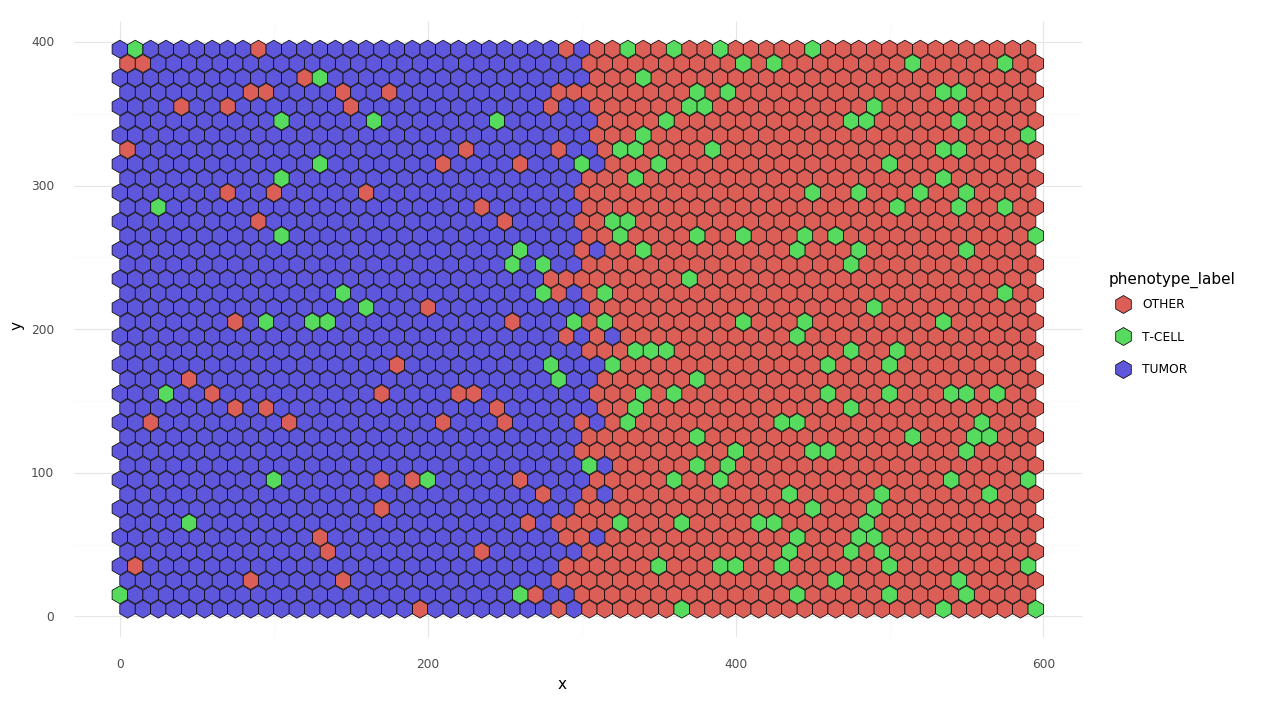

<ggplot: (305814248)>

In [7]:
(ggplot(sme.cells,aes(x='x',y='y',fill='phenotype_label'))
 + geom_point(shape='h',size=7,stroke=0.3)
 + theme_minimal()
 + theme(figure_size=(13,8))
)

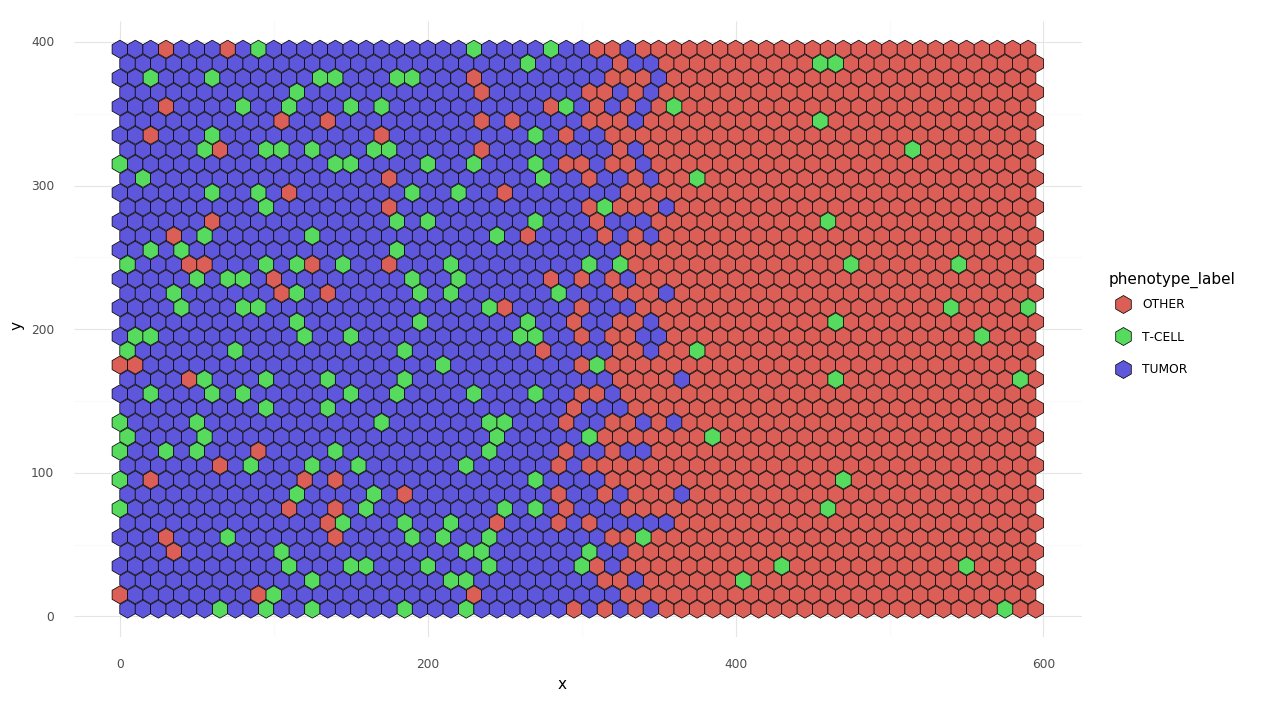

<ggplot: (273822966)>

In [8]:
(ggplot(smi.cells,aes(x='x',y='y',fill='phenotype_label'))
 + geom_point(shape='h',size=7,stroke=0.3)
 + theme_minimal()
 + theme(figure_size=(13,8))
)

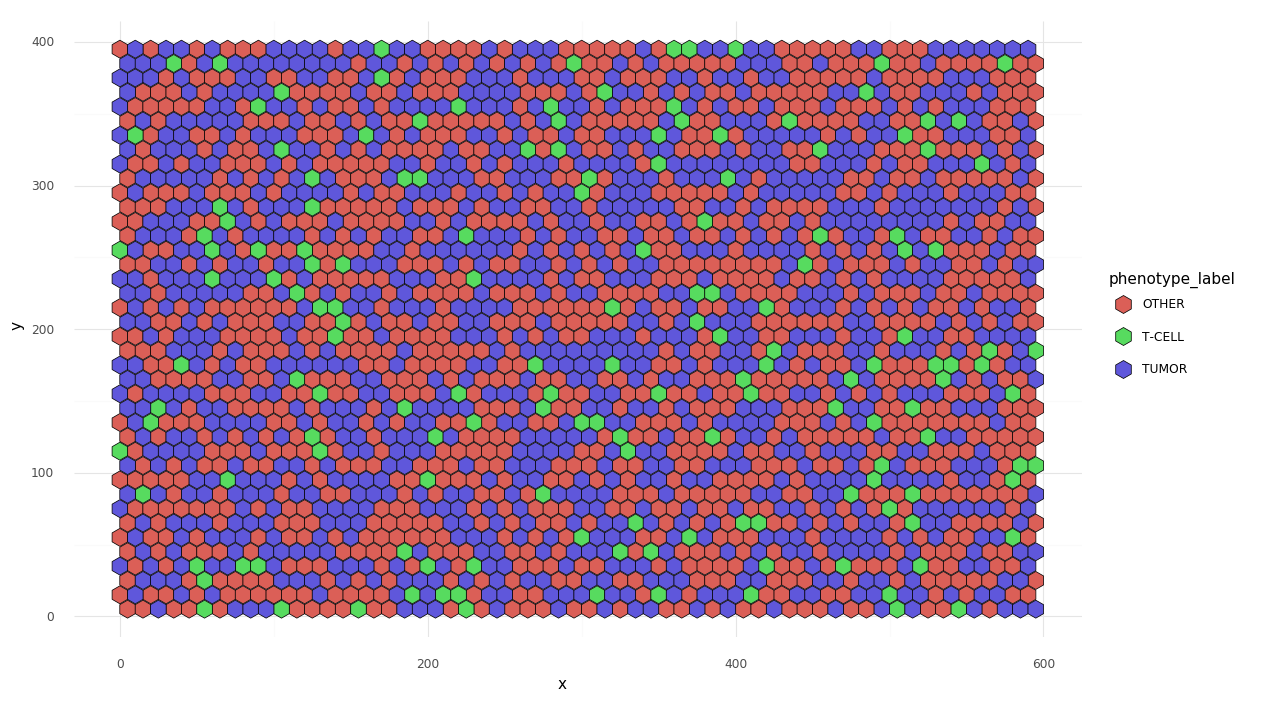

<ggplot: (-9223372036548952355)>

In [9]:
(ggplot(smu.cells,aes(x='x',y='y',fill='phenotype_label'))
 + geom_point(shape='h',size=7,stroke=0.3)
 + theme_minimal()
 + theme(figure_size=(13,8))
)

In [10]:
shape = (400,600)
fe = FrameEmitterInForm(shape=shape)
for n in range(1,5):
    for i in range(1,4):
        print((str(n),str(i)))
        c = SME(shape=shape).cells
        fe.make_inform_frame(c,'Example','E'+str(n),str(i))
        fe.make_inform_frame(c,'Example-R','E'+str(n),str(i),r_format=True)
        c = SMI(shape=shape).cells
        fe.make_inform_frame(c,'Example','I'+str(n),str(i))
        fe.make_inform_frame(c,'Example-R','I'+str(n),str(i),r_format=True)
        c = SMU(shape=shape).cells
        fe.make_inform_frame(c,'Example','U'+str(n),str(i))
        fe.make_inform_frame(c,'Example-R','U'+str(n),str(i),r_format=True)
        

('1', '1')
('1', '2')
('1', '3')
('2', '1')
('2', '2')
('2', '3')
('3', '1')
('3', '2')
('3', '3')
('4', '1')
('4', '2')
('4', '3')


In [ ]:
fe.set_cell_coordinates(c)
fe.make_cell_image()

Reading sample /Users/x/Source/pythologist-test-images/pythologisttestimages/Data/Small/Example/S1
Missing summary file /Users/x/Source/pythologist-test-images/pythologisttestimages/Data/Small/Example/S1/S1_2_cell_seg_data_summary.txt
Acquiring frame /Users/x/Source/pythologist-test-images/pythologisttestimages/Data/Small/Example/S1/S1_2_cell_seg_data.txt
Reading text data.
Finished assigning phenotype list.
Tissue seg file is present.
Finished setting the cell list regions are set.
Finished setting the measurements.
Finished reading score.
Reading image data.
Reading component images.
Finished reading component images.
Binary seg file present.
Making cell-map filled-in.
Finished cell-map.
Making edge-map.
Making dataframe of possible neighbors.
Testing for edge.
Finished edge-map.
Set interaction map if appropriateFinished reading seg file present.
Missing summary file /Users/x/Source/pythologist-test-images/pythologisttestimages/Data/Small/Example/S1/S1_1_cell_seg_data_summary.txt
Ac

In [15]:
cdf = cpi.df
cdf.microns_per_pixel = 0.496

In [16]:
cdf.counts().sample_counts()

,project_id,project_name,sample_id,sample_name,region_label,phenotype_label,cummulative_region_area_pixels,cummulative_region_area_mm2,cummulative_count,cummulative_density_mm2,mean_density_mm2,stddev_density_mm2,stderr_density_mm2,measured_frame_count,frame_count,sample_total_count,fraction
0,9722f94eec444d6589a589e744ede082,Example,3d77ec54e222485c98c11dd06e3515ff,S2,Any,OTHER,119002.0,0.029276,524.0,17898.377909,17898.377909,193.222357,136.628839,2,2,1200.0,0.436667
1,9722f94eec444d6589a589e744ede082,Example,3d77ec54e222485c98c11dd06e3515ff,S2,Any,T-CELL,119002.0,0.029276,121.0,4133.022380,4133.022380,338.139125,239.100468,2,2,1200.0,0.100833
2,9722f94eec444d6589a589e744ede082,Example,3d77ec54e222485c98c11dd06e3515ff,S2,Any,TUMOR,119002.0,0.029276,555.0,18957.251411,18957.251411,531.361482,375.729307,2,2,1200.0,0.462500
3,9722f94eec444d6589a589e744ede082,Example,83b1dc7b7aa1495184ad566367d8bac3,S1,Any,OTHER,119002.0,0.029276,527.0,18000.849538,18000.849538,531.361482,375.729307,2,2,1200.0,0.439167
4,9722f94eec444d6589a589e744ede082,Example,83b1dc7b7aa1495184ad566367d8bac3,S1,Any,T-CELL,119002.0,0.029276,120.0,4098.865170,4098.865170,966.111786,683.144195,2,2,1200.0,0.100000
5,9722f94eec444d6589a589e744ede082,Example,83b1dc7b7aa1495184ad566367d8bac3,S1,Any,TUMOR,119002.0,0.029276,553.0,18888.936992,18888.936992,434.750304,307.414888,2,2,1200.0,0.460833


In [17]:
cdf.scored_names

['PD1', 'PDL1']

In [18]:
cdf2 = cdf.threshold('T-CELL','PD1').threshold('OTHER','PDL1').threshold('TUMOR','PDL1')

In [19]:
nn = cdf2.nearestneighbors().sample_distance(minimum_edges=5)

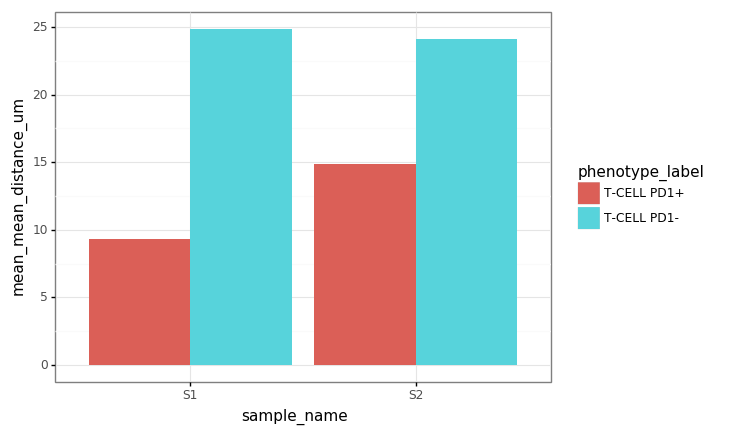

<ggplot: (318329352)>

In [20]:
df = nn[(nn['neighbor_phenotype_label']=='TUMOR PDL1-')&(nn['phenotype_label'].str.contains('T-CELL'))].copy()
(ggplot(df,aes(x='sample_name',y='mean_mean_distance_um',fill='phenotype_label'))
 + geom_bar(stat='identity',position='dodge')
 + theme_bw()
)

In [21]:
nn.head()

,project_id,project_name,sample_id,sample_name,region_label,phenotype_label,neighbor_phenotype_label,cummulative_edge_count,mean_cummulative_distance_pixels,mean_cummulative_distance_um,...,stddev_cummulative_distance_um,minimum_edges,frame_count,mean_mean_distance_pixels,mean_mean_distance_um,stddev_mean_distance_pixels,stddev_mean_distance_um,stderr_mean_distance_pixels,stderr_mean_distance_um,measured_frame_count
0,9722f94eec444d6589a589e744ede082,Example,3d77ec54e222485c98c11dd06e3515ff,S2,Any,OTHER PDL1+,OTHER PDL1+,106.0,13.274894,6.584347,...,0.245216,5,2,13.308388,6.600960,0.836841,0.415073,0.591736,0.293501,2.0
1,9722f94eec444d6589a589e744ede082,Example,3d77ec54e222485c98c11dd06e3515ff,S2,Any,OTHER PDL1+,OTHER PDL1-,106.0,10.634090,5.274508,...,0.106498,5,2,10.641830,5.278348,0.193399,0.095926,0.136754,0.067830,2.0
2,9722f94eec444d6589a589e744ede082,Example,3d77ec54e222485c98c11dd06e3515ff,S2,Any,OTHER PDL1+,T-CELL PD1+,106.0,35.200626,17.459510,...,0.984587,5,2,35.184653,17.451588,0.399083,0.197945,0.282194,0.139968,2.0
3,9722f94eec444d6589a589e744ede082,Example,3d77ec54e222485c98c11dd06e3515ff,S2,Any,OTHER PDL1+,T-CELL PD1-,106.0,17.665938,8.762305,...,0.358638,5,2,17.619989,8.739515,1.148001,0.569409,0.811759,0.402633,2.0
4,9722f94eec444d6589a589e744ede082,Example,3d77ec54e222485c98c11dd06e3515ff,S2,Any,OTHER PDL1+,TUMOR PDL1+,NaN,NaN,NaN,...,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,0.0


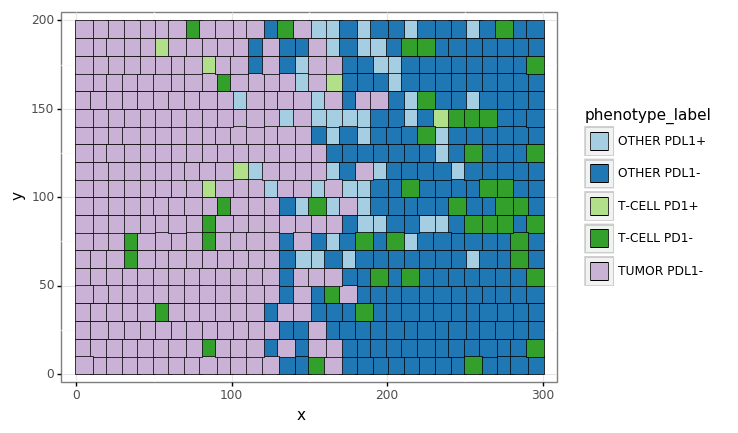

<ggplot: (-9223372036537879506)>

In [24]:
temp = cdf2[cdf2['frame_name']=='S1_1'].copy()
#temp['phenotype_label'] = pd.Categorical(temp['phenotype_label'],categories)
(ggplot(temp,aes(x='x',y='y',fill='phenotype_label'))
 + geom_point(size=7,stroke=0.3,shape='s')
 + theme_bw()
 + scale_fill_manual(('#a6cee3','#1f78b4','#b2df8a','#33a02c','#cab2d6','#6a3d9a'))
)

In [9]:
fe.set_cell_coordinates(cells)
ci,ei,pi = fe.make_cell_image()

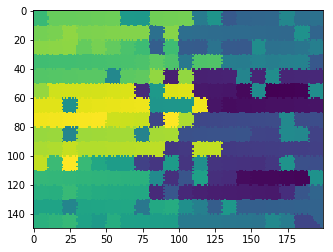

In [10]:
plt.imshow(ci.astype(np.uint16))
plt.show()

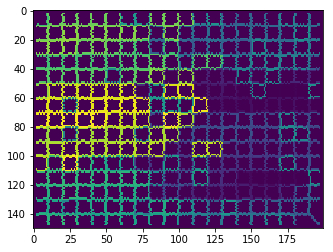

In [11]:
plt.imshow(ei.astype(np.uint16))
plt.show()

In [27]:
cells2 = cells.sort_values('phenotype_label').set_index('id').reset_index(drop=True).reset_index().\
    rename(columns={'index':'id'})
cells2

,id,x,y,phenotype_label,PD1,PDL1
0,0,195,145,OTHER,-,-
1,1,195,55,OTHER,-,-
2,2,185,115,OTHER,-,-
3,3,175,115,OTHER,-,-
4,4,165,115,OTHER,-,-
5,5,155,115,OTHER,-,-
6,6,145,115,OTHER,-,-
7,7,135,115,OTHER,-,-
8,8,185,55,OTHER,-,-
9,9,125,115,OTHER,-,-


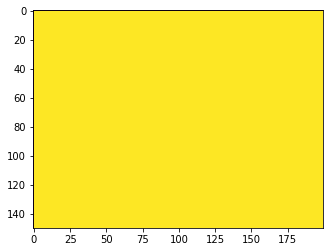

In [12]:
plt.imshow(pi.astype(np.uint8))
plt.show()

In [13]:
header = ['Cell ID','Cell X Position','Cell Y Position','Nucleus Area (pixels)',
          'Nucleus Area (percent)','Nucleus Compactness','Nucleus Minor Axis',
          'Nucleus Major Axis','Entire Cell PD-1 (Opal 540)',
          'Mean (Normalized Counts, Total Weighting)',
          'Nucleus PD-1 (Opal 540)','Mean (Normalized Counts, Total Weighting)',
          'Membrane PD-1 (Opal 540)','Mean (Normalized Counts, Total Weighting)',
          'Membrane Area (pixels)','Membrane Area (percent)','Membrane Compactness',
          'Membrane Minor Axis','Membrane Major Axis',
          'Nucleus PD-Ligand-1 (Opal 690)',
          'Mean (Normalized Counts, Total Weighting)','Entire Cell PD-Ligand-1 (Opal 690)',
          'Mean (Normalized Counts, Total Weighting)',
          'Membrane PD-Ligand-1 (Opal 690)',
          'Mean (Normalized Counts, Total Weighting)','Entire Cell Area (pixels)',
          'Entire Cell Area (percent)','Entire Cell Compactness',
          'Entire Cell Minor Axis','Entire Cell Major Axis','Phenotype','Confidence']
cs = cells.copy().rename(columns={'id':'Cell ID',
                                  'x':'Cell X Position',
                                  'y':'Cell Y Position',
                                  'phenotype_label':'Phenotype'})
fill_in = [x for x in header if x not in cs.columns]
for col in fill_in: cs[col] = 1
cs.loc[cs['PD1']=='-',cs.columns.str.contains('PD-1')] = 0
cs.loc[cs['PDL1']=='-',cs.columns.str.contains('PD-Ligand-1')] = 0

In [14]:
cs

,Cell ID,Cell X Position,Cell Y Position,Phenotype,PD1,PDL1,Nucleus Area (pixels),Nucleus Area (percent),Nucleus Compactness,Nucleus Minor Axis,...,Membrane Major Axis,Nucleus PD-Ligand-1 (Opal 690),Entire Cell PD-Ligand-1 (Opal 690),Membrane PD-Ligand-1 (Opal 690),Entire Cell Area (pixels),Entire Cell Area (percent),Entire Cell Compactness,Entire Cell Minor Axis,Entire Cell Major Axis,Confidence
0,0,195,145,OTHER,-,-,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
1,1,165,55,OTHER,-,-,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
2,2,175,55,OTHER,-,-,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
3,3,185,55,OTHER,-,-,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
4,4,185,115,OTHER,-,-,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
5,5,175,115,OTHER,-,-,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
6,6,165,115,OTHER,-,-,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
7,7,155,115,OTHER,-,-,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
8,8,145,55,OTHER,-,-,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
9,9,145,115,OTHER,-,-,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1


In [15]:
header = ['Path','Sample Name','Tissue Category',
          'First Cell Compartment','First Stain Component',
          'Second Cell Compartment','Second Stain Component',
          'Double Negative','Single PD-Ligand-1 (Opal 690)',
          'Single PD-1 (Opal 540)','Double Positive',
          'Tissue Category Area (Percent)','Number of Cells',
          'PD-Ligand-1 (Opal 690) Threshold',
          'PD-1 (Opal 540) Threshold','Lab ID','Slide ID',
          'TMA Sector','TMA Row','TMA Column','TMA Field',
          'inForm 2.1.5430.24864']
score = pd.DataFrame([len(header)*[0.5]],columns=header)
score['Path'] = '/mylocation'
score['Sample Name'] = 'sample_name'

In [16]:
score

,Path,Sample Name,Tissue Category,First Cell Compartment,First Stain Component,Second Cell Compartment,Second Stain Component,Double Negative,Single PD-Ligand-1 (Opal 690),Single PD-1 (Opal 540),...,Number of Cells,PD-Ligand-1 (Opal 690) Threshold,PD-1 (Opal 540) Threshold,Lab ID,Slide ID,TMA Sector,TMA Row,TMA Column,TMA Field,inForm 2.1.5430.24864
0,/mylocation,sample_name,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
